In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# load dataset

In [17]:
datapath = '/content/drive/MyDrive/ml_code/nlp/amazon review analysis/Reviews.csv'
df = pd.read_csv(datapath)

# **understanding data**

In [18]:
df.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [19]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB
None


In [20]:
df.drop(columns = ["ProductId","UserId","ProfileName","Time"] , inplace = True)

In [21]:
df=df.head(5000)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      5000 non-null   int64 
 1   HelpfulnessNumerator    5000 non-null   int64 
 2   HelpfulnessDenominator  5000 non-null   int64 
 3   Score                   5000 non-null   int64 
 4   Summary                 5000 non-null   object
 5   Text                    5000 non-null   object
dtypes: int64(4), object(2)
memory usage: 234.5+ KB


# handeling missing data

In [23]:
max_non_null_val = df["Id"].count()
print("Percentage of missing values in each column:\n")
missing_percent = []
for col in df.columns:
  missing_percent.append(df[col].isnull().sum()/max_non_null_val*100)
  print(f"{col} : {df[col].isnull().sum()/max_non_null_val*100}%")

Percentage of missing values in each column:

Id : 0.0%
HelpfulnessNumerator : 0.0%
HelpfulnessDenominator : 0.0%
Score : 0.0%
Summary : 0.0%
Text : 0.0%


In [24]:
df.dropna(inplace = True)
df.reset_index(drop=True, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      5000 non-null   int64 
 1   HelpfulnessNumerator    5000 non-null   int64 
 2   HelpfulnessDenominator  5000 non-null   int64 
 3   Score                   5000 non-null   int64 
 4   Summary                 5000 non-null   object
 5   Text                    5000 non-null   object
dtypes: int64(4), object(2)
memory usage: 234.5+ KB


In [25]:
for col in df:
  print(col," : ", df[col].isnull().sum())


Id  :  0
HelpfulnessNumerator  :  0
HelpfulnessDenominator  :  0
Score  :  0
Summary  :  0
Text  :  0


In [26]:
df["Combined_Text"] = df["Text"] + df["Summary"]

#VADER method

In [14]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [17]:
combined_score = []
for i in df["Combined_Text"]:
  score = sia.polarity_scores(i)
  combined_score.append(score)
print(combined_score[:5])

[{'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'compound': 0.9441}, {'neg': 0.131, 'neu': 0.869, 'pos': 0.0, 'compound': -0.5664}, {'neg': 0.066, 'neu': 0.781, 'pos': 0.153, 'compound': 0.8803}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.565, 'pos': 0.435, 'compound': 0.9468}]


In [18]:
score_list_df = pd.DataFrame(combined_score)

In [19]:
df = pd.concat([df, score_list_df], axis =1 )

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49998 entries, 0 to 49997
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      49998 non-null  int64  
 1   HelpfulnessNumerator    49998 non-null  int64  
 2   HelpfulnessDenominator  49998 non-null  int64  
 3   Score                   49998 non-null  int64  
 4   Summary                 49998 non-null  object 
 5   Text                    49998 non-null  object 
 6   Combined_Text           49998 non-null  object 
 7   neg                     49998 non-null  float64
 8   neu                     49998 non-null  float64
 9   pos                     49998 non-null  float64
 10  compound                49998 non-null  float64
dtypes: float64(4), int64(4), object(3)
memory usage: 4.2+ MB


In [21]:
for col in df:
  print(col," : ", df[col].isnull().sum())


Id  :  0
HelpfulnessNumerator  :  0
HelpfulnessDenominator  :  0
Score  :  0
Summary  :  0
Text  :  0
Combined_Text  :  0
neg  :  0
neu  :  0
pos  :  0
compound  :  0


In [37]:
df_X = df.drop(columns = ["Text","Id","Summary","Score", "Combined_Text"])
y= df["Score"]-1

## Splitting data into training and testing datasets

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, y, test_size = 0.20, random_state = 0)

##Scaling the data

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
np.where(np.isnan(X_train))

(array([], dtype=int64), array([], dtype=int64))

##Trainnig Logistic regression model



In [41]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='liblinear',random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 487    0    0    0  498]
 [ 161    0    0    0  407]
 [ 122    0    0    0  683]
 [  58    0    0    0 1439]
 [ 140    0    0    0 6005]]


0.6492

###Testing model for overfitting

In [43]:
y_train_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
print(cm)
accuracy_score(y_train, y_train_pred)


[[ 1909     0     0     0  1827]
 [  642     0     0     0  1602]
 [  518     0     0     0  2724]
 [  240     0     0     0  5551]
 [  609     0     0     0 24376]]


0.6571578578928946

##Training a knn model




In [44]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 492   75   68   71  279]
 [ 149   55   61   53  250]
 [ 135   45   73  106  446]
 [ 113   34   77  190 1083]
 [ 234  109  190  484 5128]]


0.5938

###testing for overfiting

In [46]:
y_train_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
print(cm)
accuracy_score(y_train, y_train_pred)


[[ 2483   160   175   182   736]
 [  484   662   147   186   765]
 [  446   161   995   312  1328]
 [  311   133   295  1729  3323]
 [  650   245   463  1144 22483]]


0.7088354417720886

##XG boost model

In [47]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 514   17   31   12  411]
 [ 157   21   25    9  356]
 [ 129    7   35   19  615]
 [  83    9   21   35 1349]
 [ 136   12   20   38 5939]]


0.6544

###Hyperparam tuning with optuna

In [49]:
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.7 MB/s eta 0:00:00


In [50]:
import optuna
import xgboost as xgb
from sklearn.metrics import accuracy_score


def objective(trial):
    params = {
        'objective': 'binary:logistic',
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0)
    }

    xgb_model = xgb.XGBClassifier(**params)
    xgb_model.fit(
        X_train, y_train,
        eval_set=[(X_test, y_test)],
        verbose=False
    )
    y_pred = xgb_model.predict(X_test)
    return 1 - accuracy_score(y_test, y_pred)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)
print("Best hyperparameters: ", study.best_params)


[I 2024-08-11 18:35:53,327] A new study created in memory with name: no-name-f17d0827-c5a2-4f9d-b7b0-80c3cf083b63
[I 2024-08-11 18:36:18,097] Trial 0 finished with value: 0.34630000000000005 and parameters: {'learning_rate': 0.16512517186721976, 'max_depth': 7, 'n_estimators': 162, 'colsample_bytree': 0.8499869648921488, 'subsample': 0.5239980696594193}. Best is trial 0 with value: 0.34630000000000005.
[I 2024-08-11 18:36:28,562] Trial 1 finished with value: 0.3479 and parameters: {'learning_rate': 0.14406930683701238, 'max_depth': 6, 'n_estimators': 82, 'colsample_bytree': 0.5218436584160503, 'subsample': 0.5998315462148416}. Best is trial 0 with value: 0.34630000000000005.
[I 2024-08-11 18:36:44,104] Trial 2 finished with value: 0.3427 and parameters: {'learning_rate': 0.08657660131804315, 'max_depth': 10, 'n_estimators': 82, 'colsample_bytree': 0.7969381263313032, 'subsample': 0.8222594344810679}. Best is trial 2 with value: 0.3427.
[I 2024-08-11 18:36:50,088] Trial 3 finished with 

Best hyperparameters:  {'learning_rate': 0.06334700484398947, 'max_depth': 10, 'n_estimators': 167, 'colsample_bytree': 0.9859972749618712, 'subsample': 0.8867431006096562}


###building model with best parameters

In [51]:
model = xgb.XGBClassifier(**study.best_params)

model.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 523   20   32   17  393]
 [ 149   40   18   16  345]
 [ 126   11   51   22  595]
 [  70   11   25   77 1314]
 [ 138   15   24   37 5931]]


0.6622

###test for overfitting

In [52]:
y_train_pred = model.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
print(cm)
accuracy_score(y_train, y_train_pred)

[[ 2967     2    11     8   748]
 [  211  1017    12    21   983]
 [  191    14  1161    26  1850]
 [   74     6    10  1527  4174]
 [  107     6     8    10 24854]]


0.7881894094704736

##Training a random forest model

In [53]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 514   43   45   48  335]
 [ 145   74   28   31  290]
 [ 116   27  128   44  490]
 [  87   20   48  283 1059]
 [ 149   56  120  328 5492]]


0.6491

##Training a svm model

In [55]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 110)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=110)

In [56]:
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[ 517    0    0    0  468]
 [ 179    0    0    0  389]
 [ 135    0    0    0  670]
 [  71    0    0    0 1426]
 [ 169    0    0    0 5976]]
Accuracy Score:
0.6493


###test for overfitting

In [57]:
y_train_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
print(cm)
accuracy_score(y_train, y_train_pred)


[[ 2044     0     0     0  1692]
 [  711     0     0     0  1533]
 [  594     0     0     0  2648]
 [  307     0     0     0  5484]
 [  725     0     0     0 24260]]


0.6576328816440822

###model bagging


In [58]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_samples': [0.5, 1.0],
    'max_features': [0.5, 1.0]
}

clf = BaggingClassifier(random_state=0)

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy',verbose =2)
grid_search.fit(X_train, y_train)

best_clf = grid_search.best_estimator_

y_pred = best_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Confusion Matrix:
[[ 464   16   18   12  475]
 [ 120   49   14    6  379]
 [  81   11   89   12  612]
 [  65    3   12  142 1275]
 [ 117   13   22   36 5957]]
Accuracy Score:
0.6701


##Training naive bayes model

In [59]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 484   83   46    0  372]
 [ 180   57   11    0  320]
 [ 149   58   12    0  586]
 [  97   61   18    0 1321]
 [ 255  136   87    0 5667]]


0.622

###test for overfitting

In [61]:
y_train_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
print(cm)
accuracy_score(y_train, y_train_pred)


[[ 1905   315   106     0  1410]
 [  706   211    32     0  1295]
 [  638   227    52     0  2325]
 [  388   239    67     0  5097]
 [ 1086   533   338     0 23028]]


0.6299314965748287

#predicting review scores using RoBerta model

In [27]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [29]:
tokens = []
y_pred = []
for i in df["Combined_Text"]:
  token = tokenizer.encode(i, return_tensors='pt', truncation=True)
  tokens.append(token)
  result = model(token)
  logits = result.logits
  y_pred.append(int(np.argmax(logits.detach().numpy())) + 1)

0.6948


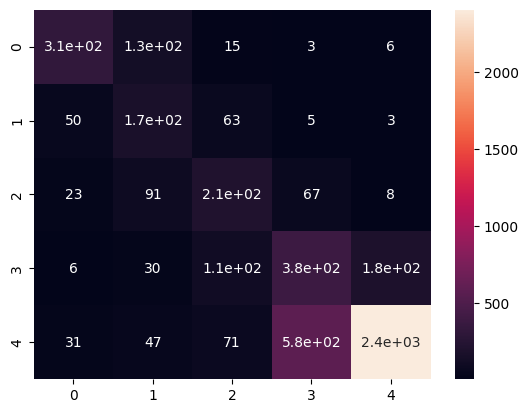

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(df["Score"], y_pred)
sns.heatmap(cm, annot = True)
print(accuracy_score(df["Score"], y_pred))